In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

calories = pd.read_csv("calories.csv")
print(calories)

exercise= pd.read_csv("exercise.csv")
print(exercise)


        User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0  

In [2]:
calories.head()


User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [3]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [4]:
exercise_df= exercise.merge(calories , on = "User_ID")
exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [5]:
print("This dataset has ", exercise_df.shape[0] ," instances and " , exercise_df.shape[1] , "columns.")


This dataset has  15000  instances and  9 columns.


In [6]:
print("Columns :")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
    print("\t" , i+1 , ".", column)

Columns :
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [8]:
exercise_df.shape[1]

9

In [9]:
exercise_df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [10]:
exercise_df.loc[:,:]


User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [11]:
exercise_df.loc[:,:].describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

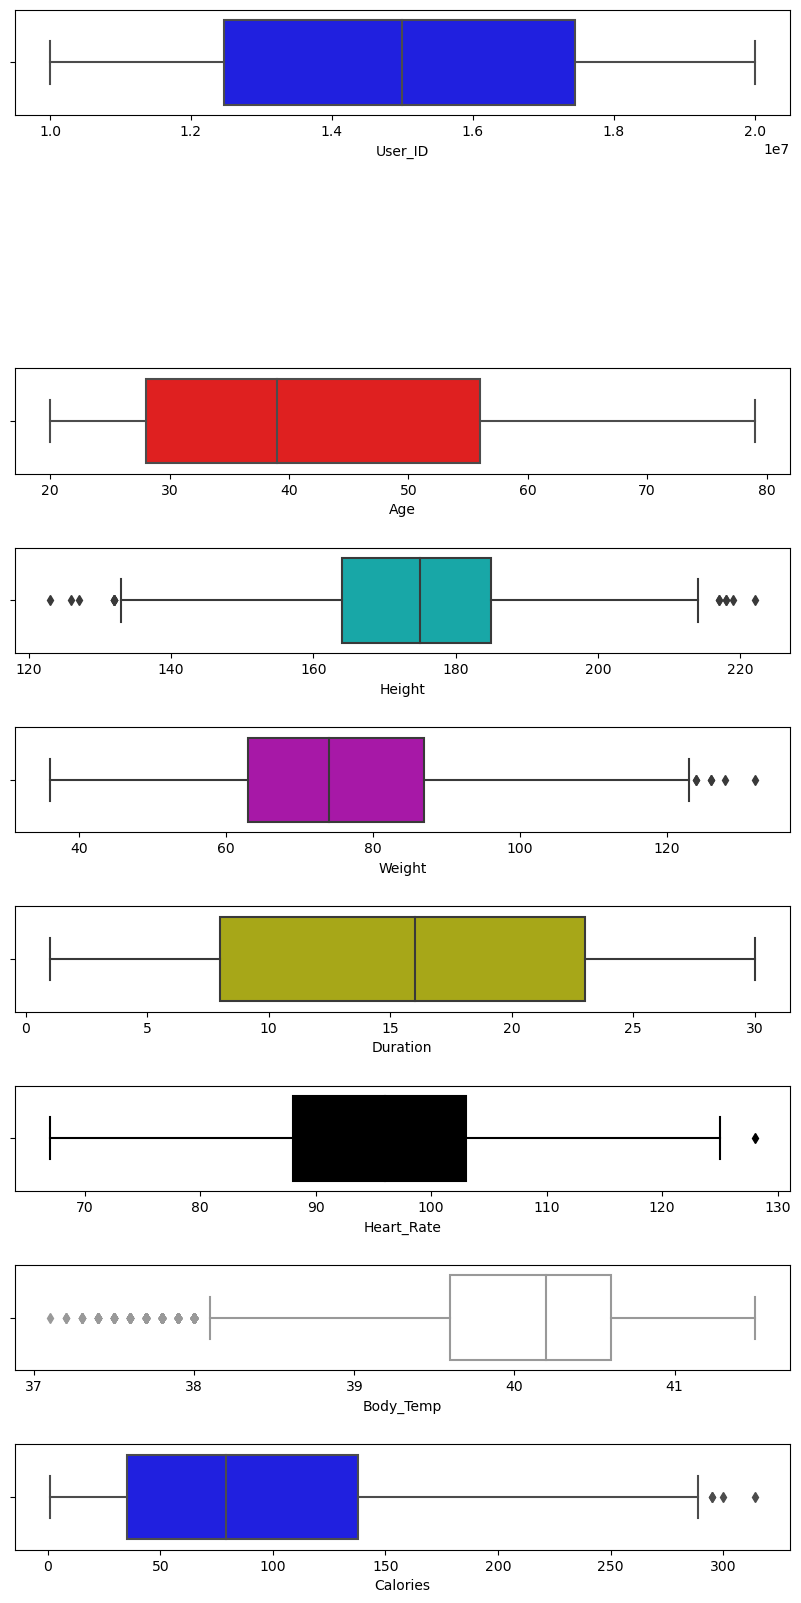

In [12]:
c = ["b","g","r","c","m","y","k","w","b"]
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace= 0.7)
axes = axes.flatten()
for i, column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
    try:
        sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

In [13]:
exercise_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


<AxesSubplot:>

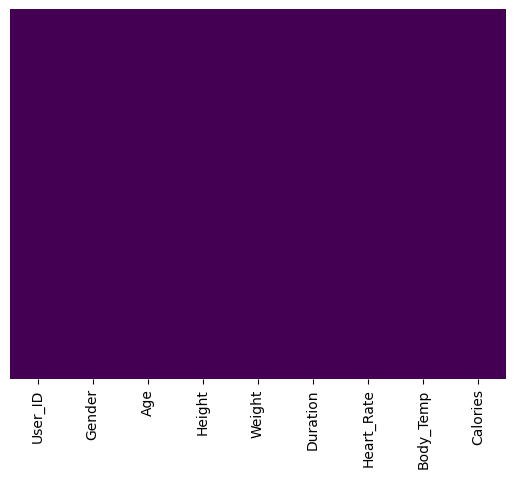

In [14]:
sns.heatmap(exercise_df.isnull(), yticklabels = False , cbar = False , cmap = "viridis")

<AxesSubplot:>

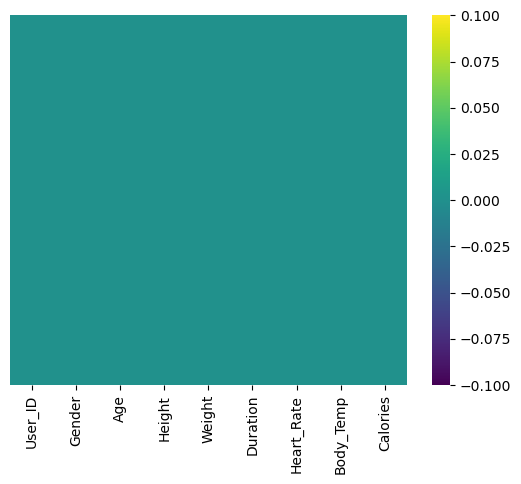

In [15]:
sns.heatmap(exercise_df.isnull(), yticklabels = False , cbar = True , cmap = "viridis")

In [16]:
print("the shape of dataset before dropping duplicates :" , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep="last" , inplace = True)
print("The shape of Dataset after dropping  duplicate :" , exercise_df.shape)


the shape of dataset before dropping duplicates : (15000, 9)
The shape of Dataset after dropping  duplicate : (15000, 9)


In [17]:
exercise_df.drop(columns = "User_ID" , inplace = True)

The shape of training data :  (12000, 8)
shape of test data :  (3000, 8)


AttributeError: 'DataFrame' object has no attribute 'column'

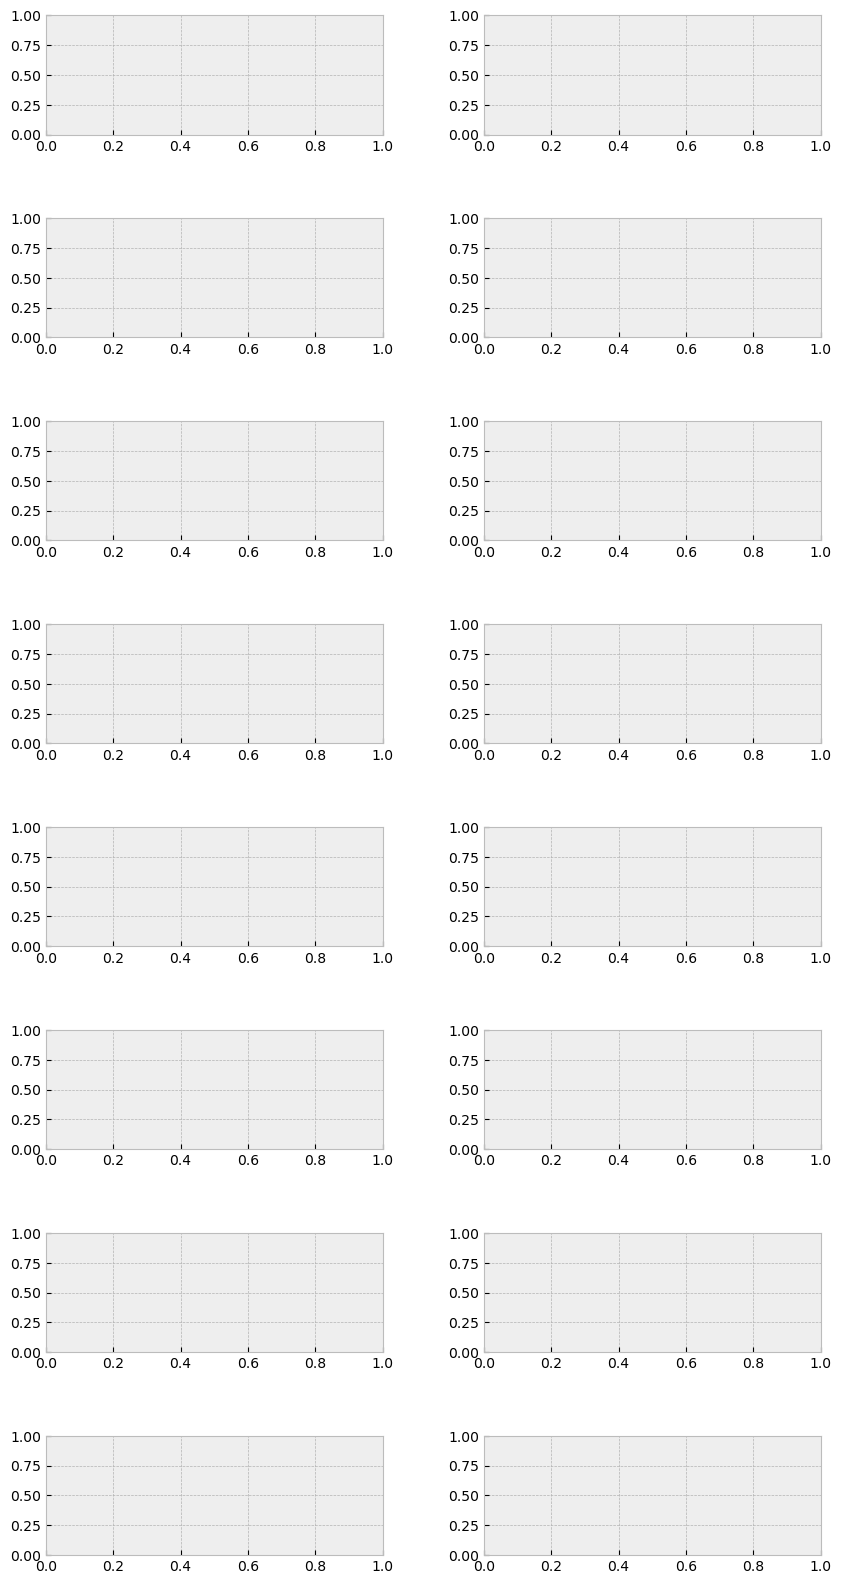

In [18]:
exercise_train_data,exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)
print("The shape of training data : " , exercise_train_data.shape)
print("shape of test data : ", exercise_test_data.shape)

from matplotlib import style
style.use("bmh")

c = ["b","g","r","c","m","y","k","w","b"]
fig1 , axes = plt.subplots(len(exercise_df.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace= 0.7)
axes = axes.flatten()
for i, column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.column):
    try:
        axes[i].title.set_test(column + "Train Distribution")
        sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i]  , color = color )
        
    except:
        fig1.delaxes(axes[i])
        continue
for i, column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.column):
    try:
        axes[i].title.set_test(column + "Train Distribution")
        sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i]  , color = color )
        
    except:
        fig1.delaxes(axes[i])
        continue
sns.pairplot(exercise_train_data[["Weight","Height" ,"Duration","Heart_Rate","Calories"]])
       



In [19]:
from matplotlib import style
style.use("bmh")

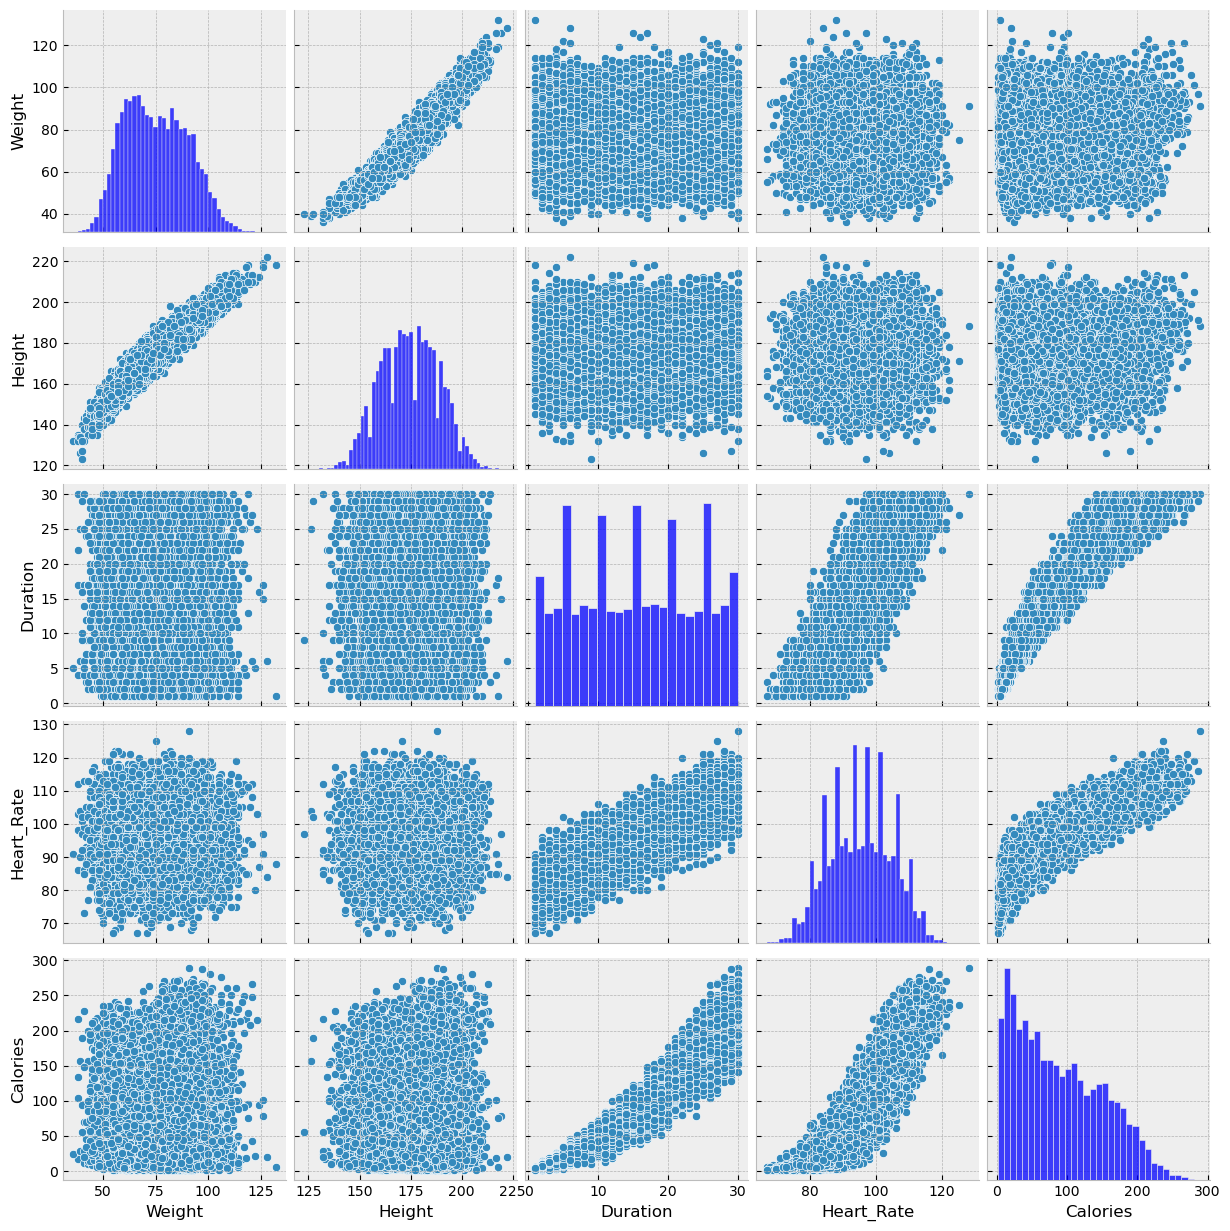

In [20]:
sns.pairplot(exercise_train_data[["Weight","Height" ,"Duration","Heart_Rate","Calories"]])

In [21]:
print("Minimum age in dataset is :", exercise_train_data["Age"].min())
print("Maximum age in dataset is :", exercise_train_data["Age"].max())

Minimum age in dataset is : 20
Maximum age in dataset is : 79


In [22]:
age_groups = ["Young" , "Middle-Aged", "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins=[20,40,60,80] , right= False , labels= age_groups)
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [23]:
exercise_train_data["age_groups"].value_counts()

Young          6029
Middle-Aged    3535
Old            2436
Name: age_groups, dtype: int64

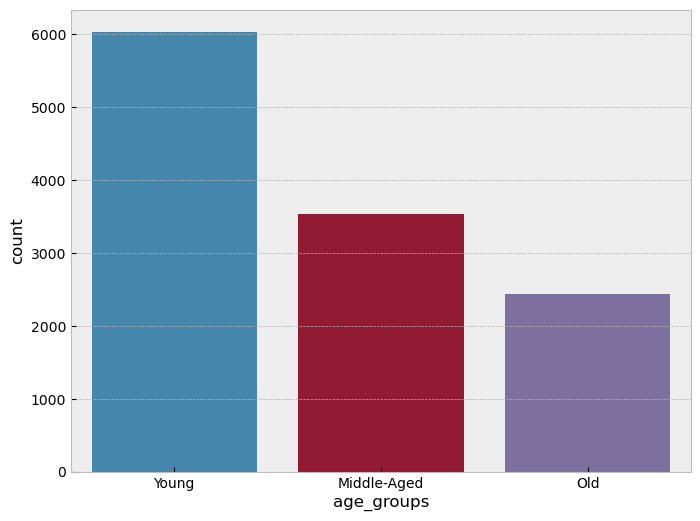

In [24]:
plt.rcParams["figure.figsize"]= 8,6
sns.countplot(data = exercise_train_data , x = "age_groups")


fig = px.box(exercise_train_data , x= "age_groups" , y="Calories" , color = "Gender")
fig.update_layout( width=700, height=450,)
fig.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

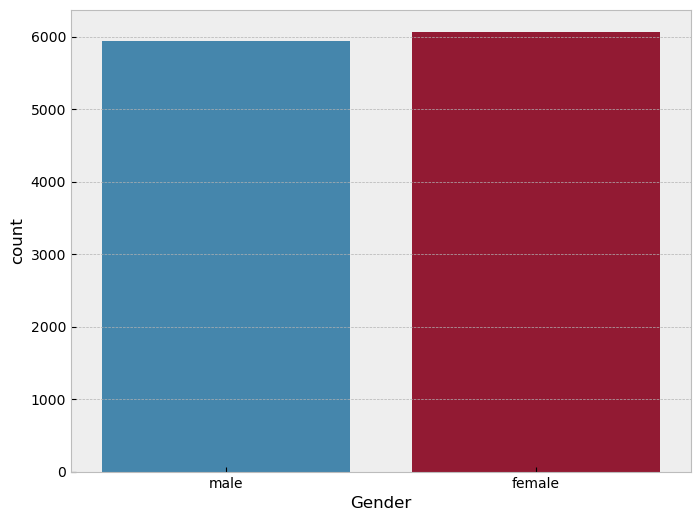

In [25]:
plt.rcParams["figure.figsize"]= 8,6
sns.countplot(data = exercise_train_data , x = "Gender")

In [26]:
fig = px.box(exercise_train_data , x= "Gender" , y="Heart_Rate" )
fig.update_layout( width=700, height=450,)
fig.show()

print("as we see the again the overall rate of both male and female  are similar. in addition to this we have an outlier for the male")

as we see the again the overall rate of both male and female  are similar. in addition to this we have an outlier for the male


In [27]:
fig = px.box(exercise_train_data , x= "age_groups" , y="Duration" , color = "Gender")
fig.update_layout( width=700, height=450,)
fig.show()

In [28]:
for data in [exercise_train_data , exercise_test_data]:
    data["BMI"] = data["Weight"] / ((data["Height"] / 100) **2)
    data["BMI"] = round(data["BMI"], 2)

In [29]:
exercise_test_data

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
7576   female   74   165.0    68.0      29.0       106.0       41.0     198.0   
10509    male   43   186.0    93.0      13.0        97.0       39.9      72.0   
4253   female   43   148.0    52.0      29.0       108.0       40.5     195.0   
5150     male   62   182.0    84.0       4.0        83.0       38.9      17.0   
506    female   37   173.0    67.0      15.0        94.0       40.0      74.0   
...       ...  ...     ...     ...       ...         ...        ...       ...   
9533     male   34   182.0    86.0      25.0       101.0       41.3     139.0   
13457  female   77   152.0    61.0       4.0        91.0       38.9      21.0   
14764  female   24   165.0    65.0       6.0        94.0       39.5      28.0   
8375     male   35   172.0    75.0      22.0        98.0       40.9     108.0   
8500   female   29   178.0    68.0       5.0        77.0       39.2      15.0   

         BMI  
7576   24.98  
10509  26.88  
4253   23.74  
5150   25.36  
506    22.39  
...      ...  
9533   25.96  
13457  26.40  
14764  23.88  
8375   25.35  
8500   21.46  

[3000 rows x 9 columns]

KeyError: ('Gender', 'Categorized_BMI')

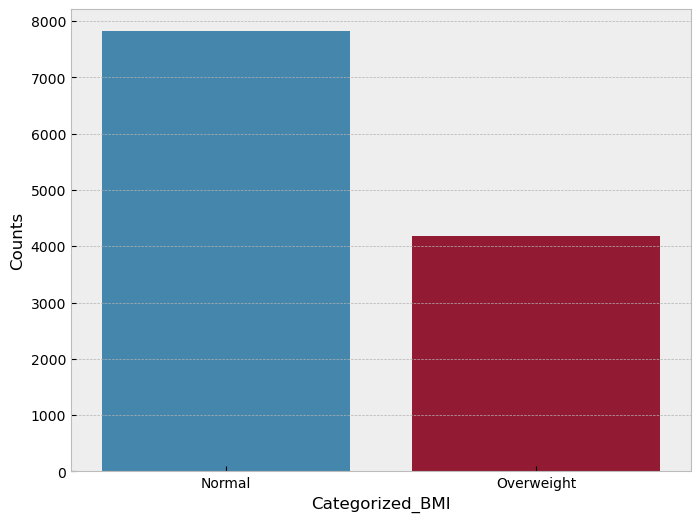

In [30]:
bmi_category = ["Very severely underweight" , "Severely underweight" , 
               "Underweight" , "Normal" ,
               "Overweight" , "Obese Class I" ,
               "Obese Class IT" , "Obese Class IIIT"]
exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins=[0,15,16,18.5,25,30,35,40,50] , right= False , labels= bmi_category)
exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object")
exercise_train_data.head()

ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Counts"]
ds

ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]


plt.rcParams["figure.figsize"] = 8 , 6
#sns.barplot(data = ds, x = "Categorized_BMI" , y = "Count" )
sns.barplot(data=ds, x="Categorized_BMI", y="Counts")

ds = exercise_train_data["Gender","Categorized_BMI"].value_counts().reset_index().sort_values(by = ["Gender"] )
ds.columns = ["Gender","Categorized_BMI" , "Counts"]
ds



plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x="Categorized_BMI", y="Counts" , hue= "Gender")



In [31]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Counts"]
ds

Categorized_BMI  Counts
0          Normal    7819
1      Overweight    4181

<AxesSubplot:xlabel='Categorized_BMI', ylabel='Counts'>

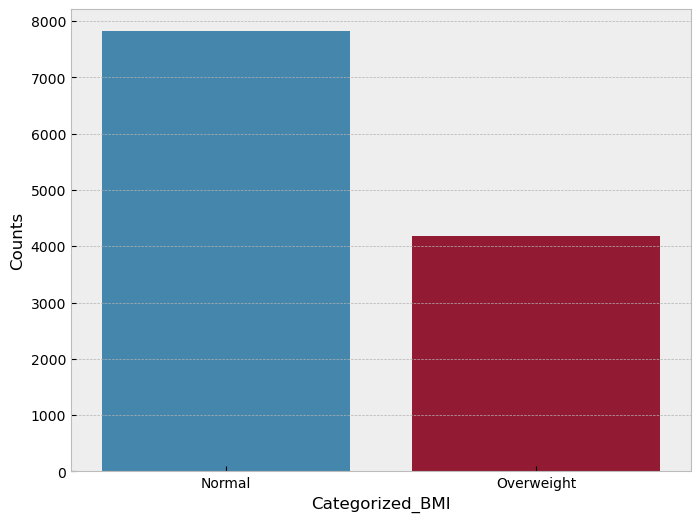

In [32]:
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]


plt.rcParams["figure.figsize"] = 8 , 6
#sns.barplot(data = ds, x = "Categorized_BMI" , y = "Count" )
sns.barplot(data=ds, x="Categorized_BMI", y="Counts")


In [34]:
ds = exercise_train_data[["Gender","Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender"] )
ds.columns = ["Gender","Categorized_BMI" , "Counts"]
ds

Gender Categorized_BMI  Counts
0  female          Normal    5572
3  female      Overweight     496
1    male      Overweight    3685
2    male          Normal    2247

<AxesSubplot:xlabel='Categorized_BMI', ylabel='Counts'>

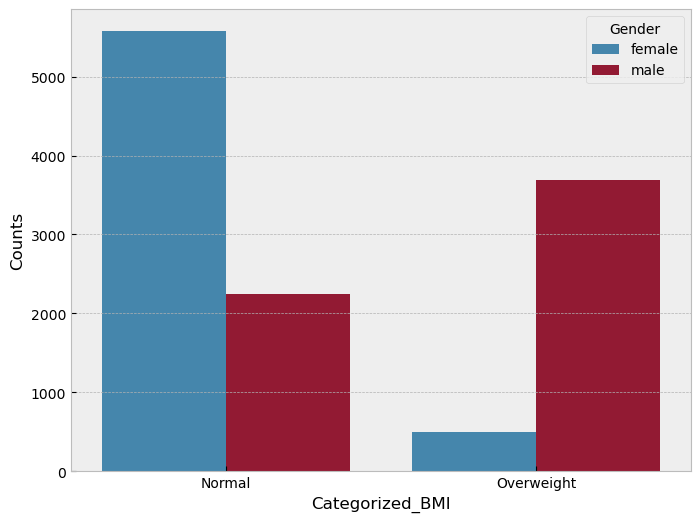

In [35]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x="Categorized_BMI", y="Counts" , hue= "Gender")


In [36]:
fig = px.scatter(exercise_train_data , x= "Duration" , y="Body_Temp" , size = "Calories")
fig.update_layout( width=700, height=450,)
fig.show()

In [42]:
exercise_train_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'Categorized_BMI'],
      dtype='object')

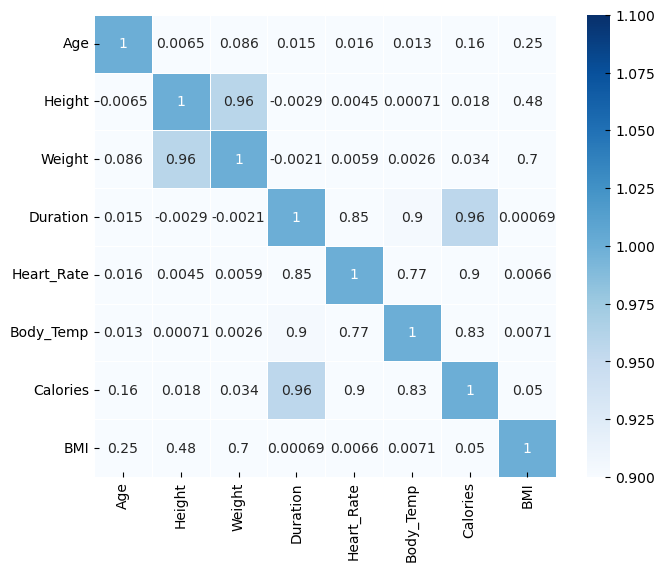

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

# Select only numeric columns before calculating correlation
corr = exercise_train_data.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, square=True, linewidth=0.5, vmin=1, vmax=1, cmap="Blues")
plt.show()



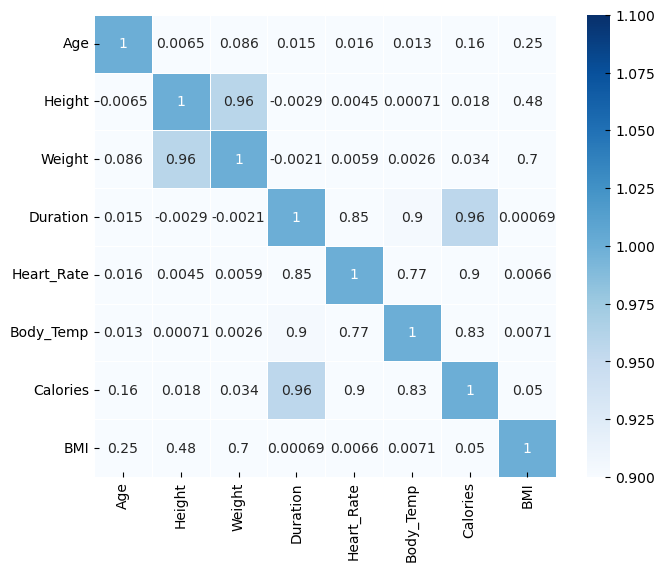

In [49]:
exercise_train_data = exercise_train_data[["Gender", "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_train_data[["Gender", "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data= pd.get_dummies(exercise_train_data , drop_first = True)
exercise_test_data= pd.get_dummies(exercise_train_data , drop_first = True)
exercise_train_data


Age    BMI  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
2643    62  27.38      14.0        88.0       40.5      68.0            1
13352   77  25.06      28.0       108.0       40.8     241.0            1
13117   73  24.57      16.0        91.0       40.2      83.0            0
2560    76  26.15      24.0        94.0       40.7     154.0            1
14297   42  22.99       7.0        93.0       39.8      32.0            1
...    ...    ...       ...         ...        ...       ...          ...
905     25  23.62      19.0        99.0       40.6     101.0            0
5192    24  26.02       6.0        84.0       39.0      16.0            1
12172   52  23.74      15.0        99.0       39.9      94.0            1
235     70  24.16       9.0        79.0       40.0      34.0            0
13349   30  23.42      11.0        87.0       39.8      46.0            0

[12000 rows x 7 columns]

In [50]:
x_train = exercise_train_data.drop("Calories" ,  axis=1)
y_train = exercise_train_data["Calories"]

x_test = exercise_train_data.drop("Calories" ,  axis=1)
y_test = exercise_train_data["Calories"]

In [51]:
linear = LinearRegression()
linear.fit(x_train , y_train)
linear_prediction = linear.predict(x_test)

In [58]:
def plot_learning_curve(model):
    train_errors = []
    val_errors = []

    for n in range(1, 1000):
        model.fit(x_train[:n], y_train[:n])  # Use 'model' instead of 'models'
        y_train_predict = model.predict(x_train[:n])
        y_val_predict = model.predict(x_train[:n])  # Use 'model' instead of 'models'

        train_errors.append(mean_squared_error(y_train[:n], y_train_predict))
        val_errors.append(mean_squared_error(y_train[:n], y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=3, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.title("Learning Curve")
    plt.xlabel("Training set size")
    plt.ylabel("Mean Squared Error")
    plt.xlim([0, 1000])
    plt.ylim([0, 25])
    plt.legend()


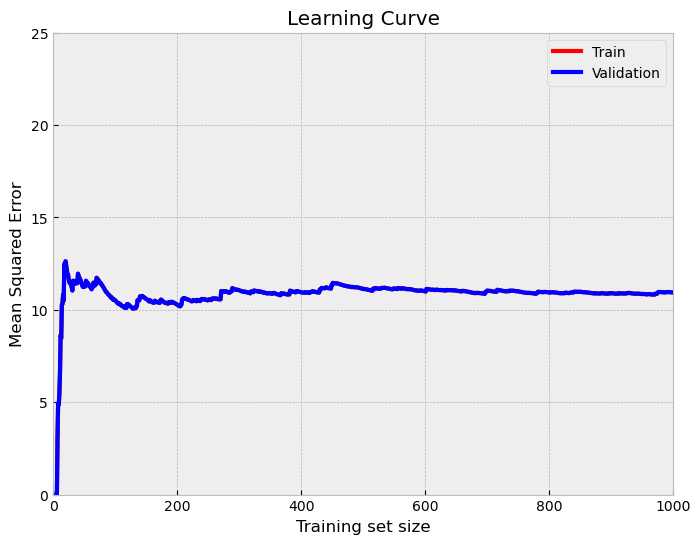

In [59]:
linreg = LinearRegression()
plot_learning_curve(linreg)  


In [64]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_prediction = linreg.predict(x_test)



In [63]:
print("linear regression mean absolute error(MAE) :", round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("linear regression mean squared error(MSE) :", round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("linear regression root mean squared error(RMSE) :", round(np.sqrt(metrics.mean_absolute_error(y_test , linreg_prediction)),2))


linear regression mean absolute error(MAE) : 8.29
linear regression mean squared error(MSE) : 126.99
linear regression root mean squared error(RMSE) : 2.88


In [70]:
from sklearn.ensemble import RandomForestRegressor



In [73]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(x_train , y_train)
random_reg_prediction = random_reg.predict(x_test)

In [74]:
print("linear regression mean absolute error(MAE) :", round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("linear regression mean squared error(MSE) :", round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("linear regression root mean squared error(RMSE) :", round(np.sqrt(metrics.mean_absolute_error(y_test , linreg_prediction)),2))

linear regression mean absolute error(MAE) : 8.29
linear regression mean squared error(MSE) : 126.99
linear regression root mean squared error(RMSE) : 2.88


In [75]:
exercise_train_data.iloc[32]

Age             23.00
BMI             24.88
Duration        27.00
Heart_Rate     102.00
Body_Temp       40.30
Calories       140.00
Gender_male      1.00
Name: 5897, dtype: float64

In [77]:
x_array = np.array([[24,25,28,100,40,1]]).reshape(1, -1)
y_pred = random_reg.predict(x_array)
print("Prediction : ", round(y_pred[0] , 2))

print("As we can see this model did a good job and the predicted value is close to the real value in the dataset")

Prediction :  146.19
As we can see this model did a good job and the predicted value is close to the real value in the dataset
